 ## Nlp iPhoneSE Reviwes: 
    
    - look at the data
    - cleaning 
    - visualize 
    - nlp cleaning 
    - Topic Modeling [LDA] Gensim 
    - Sentment Analysis
    - Classification [Nayve Bayes - Random Forest]
    - WordCloud [image]
    - Clustering 

In [231]:
import numpy as np
import spacy
import pandas as pd
import stop_words
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
plt.style.use('ggplot')
import statistics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import warnings
import re # this is the regular expression library which helps us manipulate text (strings) fairly easily and intuitively
import nltk # this is the Natural Language Tool Kit which contains a lot of functionalities for text analytics

from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

C:\Users\HP\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


________

In [232]:
df = pd.read_csv('APPLE_iPhone_SE.csv')
df.head()

C:\Users\HP\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Ratings,Comment,Reviews
0,5,Super!,Great camera for pics and videos Battery life is good so far with some setting turn of which i never use and when i use i turn those on and i use it in power saving mode all the time so a full day with light gaming of 1hr or more using camera for 1hr or more listening music in my car on youtube and Bluetooth on for couple of hours it gives me full day of battery varing from 4/5 to 6/7 hours sot per dayPerformance is top notch plays every game and every task with easeVery premium phone look...READ MORE
1,5,Must buy!,Great device. Let me tell the Pros..1. Superb build quality 2. Great display. 3. Camera is great in good lighting conditions 4. Processing is great. 5. Sound is superb. 6. Call quality is great. 7. Red colour looks superb.8. Portrait mode photography is Superb.READ MORE
2,5,Great product,"Who all loves older size i.e., 4.7 inch type should definitely go for this. Nothing is better than XR, XS or 11. Best for price and usage.READ MORE"
3,5,Simply awesome,"This iPhone SE is the best phone ever you get. Beautifully designed gives a classy look in your palms. Moreover, performance wise it is a benchmark. You will not be disappointed in this budget. My purchase point was its size. If you are looking for the same you won’t be disappointed. I strongly recommend this phone to people who is more work oriented. Game loves should skip this phone as this is not a game phone. Best features with stunning looks & performance. Battery life is very good...READ MORE"
4,5,Classy product,This is my second iphone after iphone 4s. I’ve been a long time android user in between. I’ll tell you who this phone is for. Prospective buyers can then decide1. For photo and video enthusiasts. Very reliable camera. Fast and excellent picture quality. Videos are absolutely stable and professional quality. You would be amazed how many people shoot Youtube videos on an iPhone. The only downside is that the display doesn’t do justice to the photos and videos you have taken. Night photos are ...READ MORE


In [233]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9713 entries, 0 to 9712
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Ratings  9713 non-null   int64 
 1   Comment  9713 non-null   object
 2   Reviews  9713 non-null   object
dtypes: int64(1), object(2)
memory usage: 227.8+ KB


C:\Users\HP\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [234]:
len(df)

C:\Users\HP\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


9713

In [235]:
df.shape

C:\Users\HP\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(9713, 3)

In [236]:
df.duplicated().sum()

C:\Users\HP\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


649

In [237]:
df.drop_duplicates(inplace=True)
df

C:\Users\HP\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Ratings,Comment,Reviews
0,5,Super!,Great camera for pics and videos Battery life is good so far with some setting turn of which i never use and when i use i turn those on and i use it in power saving mode all the time so a full day with light gaming of 1hr or more using camera for 1hr or more listening music in my car on youtube and Bluetooth on for couple of hours it gives me full day of battery varing from 4/5 to 6/7 hours sot per dayPerformance is top notch plays every game and every task with easeVery premium phone look...READ MORE
1,5,Must buy!,Great device. Let me tell the Pros..1. Superb build quality 2. Great display. 3. Camera is great in good lighting conditions 4. Processing is great. 5. Sound is superb. 6. Call quality is great. 7. Red colour looks superb.8. Portrait mode photography is Superb.READ MORE
2,5,Great product,"Who all loves older size i.e., 4.7 inch type should definitely go for this. Nothing is better than XR, XS or 11. Best for price and usage.READ MORE"
3,5,Simply awesome,"This iPhone SE is the best phone ever you get. Beautifully designed gives a classy look in your palms. Moreover, performance wise it is a benchmark. You will not be disappointed in this budget. My purchase point was its size. If you are looking for the same you won’t be disappointed. I strongly recommend this phone to people who is more work oriented. Game loves should skip this phone as this is not a game phone. Best features with stunning looks & performance. Battery life is very good...READ MORE"
4,5,Classy product,This is my second iphone after iphone 4s. I’ve been a long time android user in between. I’ll tell you who this phone is for. Prospective buyers can then decide1. For photo and video enthusiasts. Very reliable camera. Fast and excellent picture quality. Videos are absolutely stable and professional quality. You would be amazed how many people shoot Youtube videos on an iPhone. The only downside is that the display doesn’t do justice to the photos and videos you have taken. Night photos are ...READ MORE
...,...,...,...
9708,5,Terrific purchase,Absolutely brilliantREAD MORE
9709,5,Classy product,"Superb phone. This is my 4th iPhone, I feel SE 2020is the thinnest and pocket friendly product.READ MORE"
9710,5,Awesome,very niceREAD MORE
9711,5,Super!,Loving it as of now. Good Product .READ MORE


In [238]:
df.drop('Comment', axis=1, inplace=True)

C:\Users\HP\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [239]:
df.isna().sum()

C:\Users\HP\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Ratings    0
Reviews    0
dtype: int64

In [240]:
def value_counts_plot(df, column=None, top=None, fontsize=15):
    if top is not None:
        label_counts = df[column].value_counts().head(top)
    else:
        label_counts = df[column].value_counts()
    
    plt.figure(figsize=(10,5))
    plt.style.use('seaborn')
    if top is not None:
        bar_colors = cm.rainbow(np.linspace(0,1,top))
    else:
        bar_colors = cm.rainbow(np.linspace(0,1,len(df[column].unique())))
    plt.bar(label_counts.index.values,
            label_counts.values,
            color=bar_colors,
            linewidth=0,
            alpha=0.6)
    plt.tick_params(labelsize=fontsize)
    if top is not None:
        plt.xticks(rotation=45, ha='left')
        plt.xlabel(f'{column} top {top}', fontsize=fontsize)
    else:
        plt.xlabel(column, fontsize=fontsize)
    plt.ylabel(f'{column} value counts', fontsize=fontsize)
    plt.show()
    

C:\Users\HP\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\HP\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


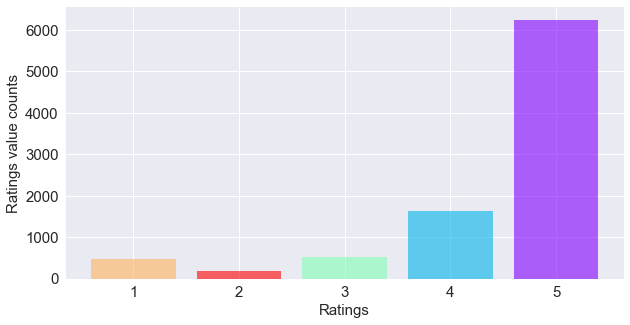

In [241]:
value_counts_plot(df, column='Ratings')

### NLP Cleaning 

 - convert lower
 - english stop words 
 - panctuations

In [242]:
import neattext.functions as nf

C:\Users\HP\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [243]:
df['Reviews'].head(1)

C:\Users\HP\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0    Great camera for pics and videos Battery life is good so far with some setting turn of which i never use and when i use i turn those on and i use it in power saving mode all the time so a full day with light gaming of 1hr or more using camera for 1hr or more listening music in my car on youtube and Bluetooth on for couple of hours it gives me full day of battery varing from 4/5 to 6/7 hours sot per dayPerformance is top notch plays every game and every task with easeVery premium phone look...READ MORE
Name: Reviews, dtype: object

In [244]:
import re
import string

alphanumeric = lambda x: re.sub('\w*\d\w*', ' ', x)
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())

df['Reviews'] = df.Reviews.map(alphanumeric).map(punc_lower)
df.head()


C:\Users\HP\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:4: DeprecationWarning: invalid escape sequence \w
<>:4: DeprecationWarning: invalid escape sequence \w
<ipython-input-244-ce8b71ec91d0>:4: DeprecationWarning: invalid escape sequence \w
  alphanumeric = lambda x: re.sub('\w*\d\w*', ' ', x)


,Ratings,Reviews
0,5,great camera for pics and videos battery life is good so far with some setting turn of which i never use and when i use i turn those on and i use it in power saving mode all the time so a full day with light gaming of or more using camera for or more listening music in my car on youtube and bluetooth on for couple of hours it gives me full day of battery varing from to hours sot per dayperformance is top notch plays every game and every task with easevery premium phone look read more
1,5,great device let me tell the pros superb build quality great display camera is great in good lighting conditions processing is great sound is superb call quality is great red colour looks superb portrait mode photography is superb read more
2,5,who all loves older size i e inch type should definitely go for this nothing is better than xr xs or best for price and usage read more
3,5,this iphone se is the best phone ever you get beautifully designed gives a classy look in your palms moreover performance wise it is a benchmark you will not be disappointed in this budget my purchase point was its size if you are looking for the same you won’t be disappointed i strongly recommend this phone to people who is more work oriented game loves should skip this phone as this is not a game phone best features with stunning looks performance battery life is very good read more
4,5,this is my second iphone after iphone i’ve been a long time android user in between i’ll tell you who this phone is for prospective buyers can then for photo and video enthusiasts very reliable camera fast and excellent picture quality videos are absolutely stable and professional quality you would be amazed how many people shoot youtube videos on an iphone the only downside is that the display doesn’t do justice to the photos and videos you have taken night photos are read more


In [245]:
df.sample(20)

C:\Users\HP\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Ratings,Reviews
5816,5,i got very bad battery without use dropping the battery percentageread more
6317,5,amazing phone thanks flipkartread more
904,1,i you were using full display earlier this would look outdated the problem with smaller screen is the typing with smaller screen you wan t get enough are to type and bezels looks pretty bad read more
6362,5,amazing packaging and fast deliveryread more
316,5,i am writing this review after few days of use so it is just awesome camera quality is not satisfactory as the video made by this phone are yellowish in colour as compared to other phone videos speed is just awesome as bionic chip is there battery is mah so it doesn’t last long as iphones are not made for long lasting batteries but they are light in weight and high performance with no problem of hang i used my iphone for years months so i expect this one to last ling read more
8141,3,apple phones are the most overrated thing you can get read more
3253,5,good phoneread more
3124,5,happyread more
5686,4,nice under more
6904,1,recieved a dead on arrival phoneread more


In [246]:
df.Reviews[0]

C:\Users\HP\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'great camera for pics and videos battery life is good so far with some setting turn of which i never use and when i use i turn those on and i use it in power saving mode all the time so a full day with light gaming of   or more using camera for   or more listening music in my car on youtube and bluetooth on for couple of hours it gives me full day of battery varing from     to     hours sot per dayperformance is top notch plays every game and every task with easevery premium phone look   read more'

In [247]:
# pd.set_option("max_columns", None)
pd.set_option('max_colwidth', None)
df['Reviews'].head(1)

C:\Users\HP\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0    great camera for pics and videos battery life is good so far with some setting turn of which i never use and when i use i turn those on and i use it in power saving mode all the time so a full day with light gaming of   or more using camera for   or more listening music in my car on youtube and bluetooth on for couple of hours it gives me full day of battery varing from     to     hours sot per dayperformance is top notch plays every game and every task with easevery premium phone look   read more
Name: Reviews, dtype: object

In [249]:
def clean_text(Reviews):
    # tokenize text and remove puncutation
    Reviews = [word.strip(string.punctuation) for word in Reviews.split(" ")]
    # remove words that contain numbers
    Reviews = [word for word in Reviews if not any(c.isdigit() for c in word)]
    
    # remove empty tokens
    Reviews = [t for t in Reviews if len(t) > 0]
    # remove words with only one letter
    Reviews = [t for t in Reviews if len(t) > 1]
    # join all
    Reviews = " ".join(Reviews)
    return(Reviews)
def keep_english(Reviews):
    Reviews = re.sub("[^a-zA-Z]+", " ", Reviews)
    return Reviews
df['Reviews'] = df['Reviews'].apply(lambda x: keep_english(x))
# clean text data
df['Reviews'] = df['Reviews'].apply(lambda x: clean_text(x))

C:\Users\HP\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [250]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
 
lemmy = WordNetLemmatizer()
def apply_lem(Reviews):
    Reviews_split = Reviews.split(' ')
    lem_v_Reviews = ''
    for Reviews in Reviews_split:
        lem_v_Reviews += lemmy.lemmatize(Reviews, pos='v') + ' '
        Reviews_split = lem_v_Reviews.split(' ')
        lem_Reviews =''
    for Reviews in Reviews_split:
        lem_Reviews += lemmy.lemmatize(Reviews, pos='a') + ' '
    return lem_Reviews
df['Reviews'] = df['Reviews'].apply(apply_lem)
df["Reviews"]



C:\Users\HP\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0             great camera for pics and videos battery life be good so far with some set turn of which never use and when use turn those on and use it in power save mode all the time so full day with light game of or more use camera for or more listen music in my car on youtube and bluetooth on for couple of hours it give me full day of battery varing from to hours sot per dayperformance be top notch play every game and every task with easevery premium phone look read more  
1                                                                                                                                                                                                                                                    great device let me tell the pros superb build quality great display camera be great in good light condition process be great sound be superb call quality be great red colour look superb portrait mode photography be superb read more  
2                                       

In [251]:
df['Reviews'] = df['Reviews'].apply(nf.remove_puncts)
df['Reviews'] = df['Reviews'].apply(nf.remove_numbers)
df['Reviews'] = df['Reviews'].apply(nf.remove_multiple_spaces)
df['Reviews'] = df['Reviews'].apply(nf.remove_special_characters)
df['Reviews'] = df['Reviews'].apply(nf.remove_stopwords)

lower = lambda x : x.lower()
df['Reviews'].map(lower)

C:\Users\HP\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0                              great camera pics videos battery life good far set turn use use turn use power save mode time day light game use camera listen music car youtube bluetooth couple hours day battery varing hours sot dayperformance notch play game task easevery premium phone look read
1                                                                                                  great device let tell pros superb build quality great display camera great good light condition process great sound superb quality great red colour look superb portrait mode photography superb read
2                                                                                                                                                                                                                                    love old size inch type definitely good xr xs best price usage read
3                    iphone se best phone beautifully design classy look palm performance wise benchmark disa

### Fatures Enginering 


----

In [252]:
def add_reviews(x):
        if x['Ratings'] >= 3 : 
            text = 1

        elif x['Ratings'] < 3 : 
            text = 0
        return text

df['Sentiment'] = df.apply(add_reviews,axis=1)

C:\Users\HP\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [253]:
Positive = df[df.Sentiment == 1]
Positive

C:\Users\HP\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Ratings,Reviews,Sentiment
0,5,great camera pics videos battery life good far set turn use use turn use power save mode time day light game use camera listen music car youtube bluetooth couple hours day battery varing hours sot dayperformance notch play game task easevery premium phone look read,1
1,5,great device let tell pros superb build quality great display camera great good light condition process great sound superb quality great red colour look superb portrait mode photography superb read,1
2,5,love old size inch type definitely good xr xs best price usage read,1
3,5,iphone se best phone beautifully design classy look palm performance wise benchmark disappoint budget purchase point size look win disappoint strongly recommend phone people work orient game love skip phone game phone best feature stun look performance battery life good read,1
4,5,second iphone iphone long time android user tell phone prospective buyers photo video enthusiasts reliable camera fast excellent picture quality videos absolutely stable professional quality amaze people shoot youtube videos iphone downside display justice photos videos night photos read,1
...,...,...,...
9708,5,absolutely brilliantread,1
9709,5,superb phone iphone feel se thin pocket friendly product read,1
9710,5,niceread,1
9711,5,love good product read,1


In [254]:
negative = df[df.Sentiment == 0]
negative

C:\Users\HP\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Ratings,Reviews,Sentiment
16,1,fine mobile battery battery consumption brightness invideo reduction mins phone reduction mins bite fast consumption iphone use sure regular battery consumption rate look nice read,0
59,1,good product cost quality good time hangout battery consumption half day finally best suggestion choose read,0
190,2,fail basic things phone ipad disconnect wifi hot spot disconnect switch use hot spot compact iphone outstanding sound speaker read,0
387,2,good thing phone processor use good processor average camera average screen size udapted new software ui friendly present software version good android phone price shell extra buck high version iphone worth read,0
396,2,outdated tiny phone poor battery life tiny phone thing good maybe camera useless low light netflix movies appear screen imagine bar view movies netflix tiny phone face ear speaker fade away audible months despite clean rub alcohol performance chip useless phone ti read,0
...,...,...,...
9567,2,battery day charge morning battery till night drain till eveningread,0
9571,2,matter phone perform good camera battery capacity low handle phone receive phone today morning purchase phone official use use social media apps installation sense heatcharged time till upto literally battery discharge read,0
9579,2,char cable faultyread,0
9605,2,ok battery utterly fail buy phone need day chargeread,0


In [255]:
df['Reviews'] = df['Reviews'].apply(nf.clean_text)

C:\Users\HP\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [256]:
cleaned_data = [sentence for sentence in df['Reviews']]
cleaned_data

C:\Users\HP\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['great camera pics videos battery life good far set turn use use turn use power save mode time day light game use camera listen music car youtube bluetooth couple hours day battery varing hours sot dayperformance notch play game task easevery premium phone look read',
 'great device let tell pros superb build quality great display camera great good light condition process great sound superb quality great red colour look superb portrait mode photography superb read',
 'love old size inch type definitely good xr xs best price usage read',
 'iphone se best phone beautifully design classy look palm performance wise benchmark disappoint budget purchase point size look win disappoint strongly recommend phone people work orient game love skip phone game phone best feature stun look performance battery life good read',
 'second iphone iphone long time android user tell phone prospective buyers photo video enthusiasts reliable camera fast excellent picture quality videos absolutely stable prof

In [290]:
from nltk.corpus import stopwords

ENGLISH_STOP_WORDS = stopwords.words('english')
stop_words = text.ENGLISH_STOP_WORDS.union(["im","i","phone","iphone","read","use","ear","ui","heat","morning","netflix","look","life","po"
             ,"se","love"])

review_text = df['Reviews'] 
    
review_text  = review_text.apply(lambda x:[word for sentence in x for word in sentence if word not in stop_words])
review_text

C:\Users\HP\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0       [g, r, e, t,  , c, m, e, r,  , p, c, s,  , v, d, e, o, s,  , b, t, t, e, r, y,  , l, f, e,  , g, o, o, d,  , f, r,  , s, e, t,  , t, u, r, n,  , u, s, e,  , u, s, e,  , t, u, r, n,  , u, s, e,  , p, o, w, e, r,  , s, v, e,  , m, o, d, e,  , t, m, e,  , d, y,  , l, g, h, t,  , g, m, e,  , u, s, e,  , ...]
1       [g, r, e, t,  , d, e, v, c, e,  , l, e, t,  , t, e, l, l,  , p, r, o, s,  , s, u, p, e, r, b,  , b, u, l, d,  , q, u, l, t, y,  , g, r, e, t,  , d, s, p, l, y,  , c, m, e, r,  , g, r, e, t,  , g, o, o, d,  , l, g, h, t,  , c, o, n, d, t, o, n,  , p, r, o, c, e, s, s,  , g, r, e, t,  , s, o, u, n, d, ...]
2                                                                                                                                    [l, o, v, e,  , o, l, d,  , s, z, e,  , n, c, h,  , t, y, p, e,  , d, e, f, n, t, e, l, y,  , g, o, o, d,  , x, r,  , x, s,  , b, e, s, t,  , p, r, c, e,  , u, s, g, e,  , r, e, d]
3       [p, h, o, n, e,  , s, e,  , b, e, s, t,  , p, h, o

C:\Users\HP\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


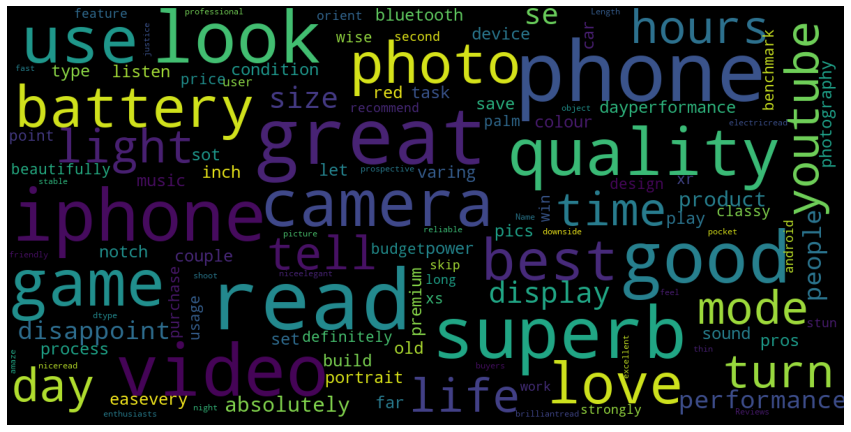

In [295]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='black',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
).generate(str(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df['Reviews'])

C:\Users\HP\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


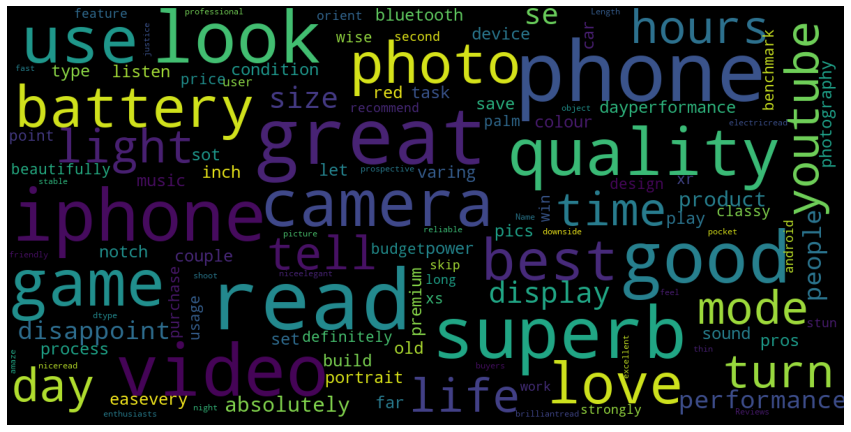

In [296]:
show_wordcloud(Positive['Reviews'])

C:\Users\HP\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


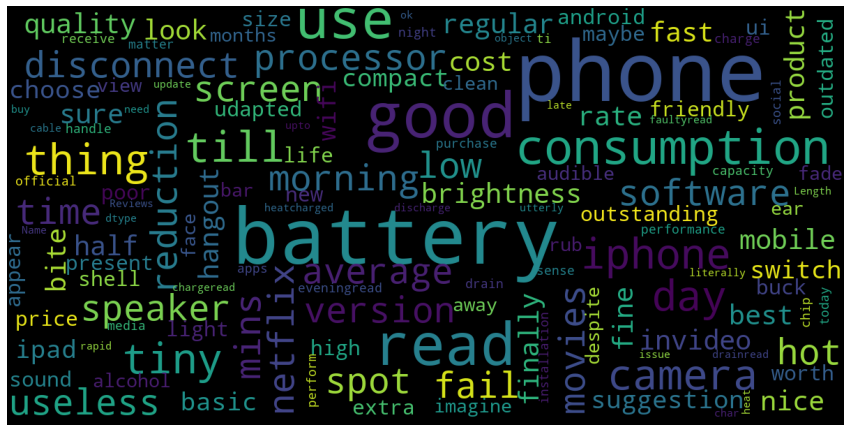

In [297]:
show_wordcloud(negative['Reviews'])

In [298]:
df['Reviews'].head(1)

C:\Users\HP\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0    great camera pics videos battery life good far set turn use use turn use power save mode time day light game use camera listen music car youtube bluetooth couple hours day battery varing hours sot dayperformance notch play game task easevery premium phone look read
Name: Reviews, dtype: object

In [299]:
df.head(20)

C:\Users\HP\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Ratings,Reviews,Sentiment,cluster2
0,5,great camera pics videos battery life good far set turn use use turn use power save mode time day light game use camera listen music car youtube bluetooth couple hours day battery varing hours sot dayperformance notch play game task easevery premium phone look read,1,0
1,5,great device let tell pros superb build quality great display camera great good light condition process great sound superb quality great red colour look superb portrait mode photography superb read,1,0
2,5,love old size inch type definitely good xr xs best price usage read,1,0
3,5,iphone se best phone beautifully design classy look palm performance wise benchmark disappoint budget purchase point size look win disappoint strongly recommend phone people work orient game love skip phone game phone best feature stun look performance battery life good read,1,0
4,5,second iphone iphone long time android user tell phone prospective buyers photo video enthusiasts reliable camera fast excellent picture quality videos absolutely stable professional quality amaze people shoot youtube videos iphone downside display justice photos videos night photos read,1,0
5,4,totally worth price ios fan like compact phone want switch android iphone like click good photos camera unbeatable multitask normal phone stick apps hiatus lag like listen music speakers watch movie music feel like dolby atmos lot technical advantage dont want yo read,1,2
6,4,mobile handy pack good performances nice camera iphone good experience apple battery bad hardly hours screen time positive thing come know hours spend mobile poor battery use mobile hours day read,1,2
7,4,compact handy good image stability amaze experience battery capacity little poor worth buy budget ratingread,1,2
8,4,use apple time amaze performance wise phone ultra camera pretty good attach image indoor display good best thing phone size easy use phone singe handedly excellent grip fit crisply pocket bad thing battery long good power bank avoid sudden switch read,1,2
9,3,purchase new iphone se base usage week rate product follow pros display quality good camera quality excellent sharp image blurriness touch sensor work precisely durability phone good quality body aluminum durable aluminum mobile industry read,1,3


## Fauter Enginering 

C:\Users\HP\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sentiment', ylabel='count'>

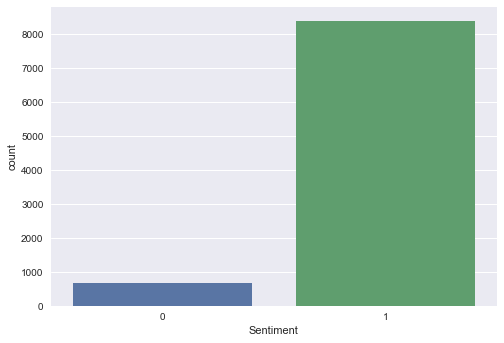

In [258]:
sns.countplot(df["Sentiment"])

_______

In [57]:
count_vectorizer_ngram = CountVectorizer(ngram_range=(1,2), binary=True, stop_words='english')
doc_word_ngram = count_vectorizer_ngram.fit_transform(df.Reviews)
pd.DataFrame(doc_word_ngram.toarray(), columns=count_vectorizer_ngram.get_feature_names())

,aa,aa bad,aaaamazing,aaaamazing sound,aagye,aagye use,aall,aall aspects,aame,aame usual,...,zeroservices cart,zone,zone small,zoom,zoom browse,zoom display,zoom light,zoom photos,zoom picture,zoom read
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9059,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9060,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9061,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9062,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Topic Modeling With Genism 

In [259]:
import gensim

corpus = [sentence.split() for sentence in cleaned_data]
corpus

C:\Users\HP\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['great',
  'camera',
  'pics',
  'videos',
  'battery',
  'life',
  'good',
  'far',
  'set',
  'turn',
  'use',
  'use',
  'turn',
  'use',
  'power',
  'save',
  'mode',
  'time',
  'day',
  'light',
  'game',
  'use',
  'camera',
  'listen',
  'music',
  'car',
  'youtube',
  'bluetooth',
  'couple',
  'hours',
  'day',
  'battery',
  'varing',
  'hours',
  'sot',
  'dayperformance',
  'notch',
  'play',
  'game',
  'task',
  'easevery',
  'premium',
  'phone',
  'look',
  'read'],
 ['great',
  'device',
  'let',
  'tell',
  'pros',
  'superb',
  'build',
  'quality',
  'great',
  'display',
  'camera',
  'great',
  'good',
  'light',
  'condition',
  'process',
  'great',
  'sound',
  'superb',
  'quality',
  'great',
  'red',
  'colour',
  'look',
  'superb',
  'portrait',
  'mode',
  'photography',
  'superb',
  'read'],
 ['love',
  'old',
  'size',
  'inch',
  'type',
  'definitely',
  'good',
  'xr',
  'xs',
  'best',
  'price',
  'usage',
  'read'],
 ['iphone',
  'se',
  'be

In [260]:
dictionary = gensim.corpora.Dictionary(corpus)
dictionary

C:\Users\HP\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [261]:
data_matrix = [dictionary.doc2bow(word) for word in corpus]
data_matrix

C:\Users\HP\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[[(0, 2),
  (1, 1),
  (2, 2),
  (3, 1),
  (4, 1),
  (5, 2),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 2),
  (10, 1),
  (11, 1),
  (12, 2),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 2),
  (32, 4),
  (33, 1),
  (34, 1),
  (35, 1)],
 [(2, 1),
  (10, 1),
  (11, 5),
  (14, 1),
  (16, 1),
  (17, 1),
  (25, 1),
  (36, 1),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 2),
  (47, 1),
  (48, 1),
  (49, 4),
  (50, 1)],
 [(10, 1),
  (25, 1),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 1),
  (56, 1),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 1)],
 [(0, 1),
  (9, 2),
  (10, 1),
  (13, 1),
  (16, 3),
  (20, 4),
  (25, 1),
  (51, 2),
  (54, 1),
  (57, 1),
  (62, 1),
  (63, 1),
  (64, 1),
  (65, 1),
  (66, 1),
  (67, 2),
  (68, 1),
  (69, 1),
  (70, 1),
  (71, 1),
  (72, 1)

In [262]:
# Generate Topics
Lda = gensim.models.ldamodel.LdaModel
ldamodel = Lda(data_matrix, num_topics=5, id2word = dictionary, passes=50)
ldamodel.print_topics(num_topics=5, num_words=5)

C:\Users\HP\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.056*"read" + 0.045*"flipkart" + 0.042*"product" + 0.037*"phone" + 0.033*"thank"'),
 (1,
  '0.050*"phone" + 0.043*"read" + 0.035*"iphone" + 0.032*"camera" + 0.026*"good"'),
 (2,
  '0.090*"read" + 0.067*"good" + 0.054*"best" + 0.045*"phone" + 0.043*"nice"'),
 (3,
  '0.110*"battery" + 0.041*"phone" + 0.040*"good" + 0.035*"read" + 0.027*"use"'),
 (4,
  '0.026*"big" + 0.020*"billion" + 0.018*"performanceread" + 0.018*"mode" + 0.017*"days"')]

In [280]:
# Topic Visualize With pyLDAvis
!pip install pyLDAvis
import sys
!{sys.executable} -m pip install pyLDAvis


!python -m pip install pyLDAvis
import pyLDAvis
import pyLDAvis.gensim_models as pgm


pyLDAvis.enable_notebook()

vis = pgm.prepare(ldamodel, data_matrix, dictionary)

pyLDAvis.save_html(vis, 'lda.html')
vis

C:\Users\HP\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.127004  0.085345       1        1  44.606581
3      0.033844  0.248543       2        1  19.647649
0      0.054473 -0.118810       3        1  15.256844
2      0.139361 -0.180273       4        1  13.299004
4     -0.354682 -0.034804       5        1   7.189922, topic_info=         Term         Freq        Total Category  logprob  loglift
0     battery  2747.000000  2747.000000  Default  30.0000  30.0000
25       read  3928.000000  3928.000000  Default  29.0000  29.0000
51       best  1084.000000  1084.000000  Default  28.0000  28.0000
179   product  1066.000000  1066.000000  Default  27.0000  27.0000
388  flipkart   584.000000   584.000000  Default  26.0000  26.0000
..        ...          ...          ...      ...      ...      ...
69     iphone    63.648909  1728.366158   Topic5  -4.5554  -0.6691
358        ok    32.719591   138.913896   Topic5  -5.2208   1.1866
969      sale    28.100291   110.431646   Topic5  -5.3730   1.2639
631      deal    27.538261   165.150670   Topic5  -5.3932   0.8412
112      dont    25.238386    64.503114   Topic5  -5.4804   1.6941

[297 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
473       4  0.257769  actually
473       5  0.716025  actually
1415      2  0.197974   adapter
1415      5  0.791894   adapter
2462      5  0.969383   adaptor
...     ...       ...       ...
131       2  0.178478     worth
131       3  0.132820     worth
131       4  0.431667     worth
243       1  0.996224     years
35        2  0.979519   youtube

[354 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 4, 1, 3, 5])

C:\Users\HP\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


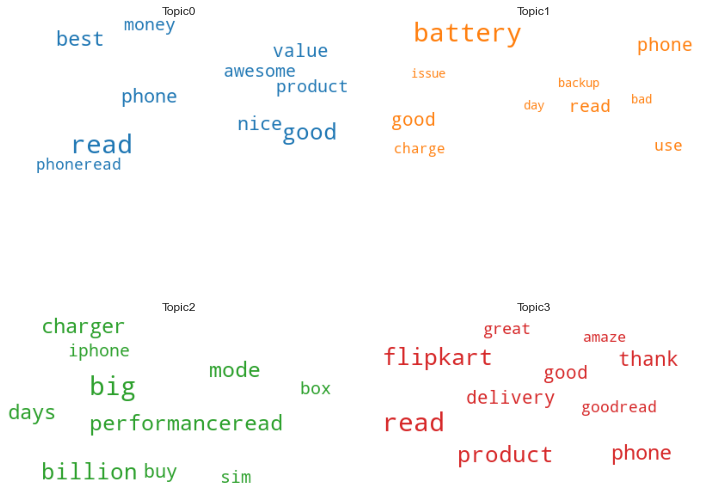

In [264]:
import matplotlib.colors as mcolors


cols = [color for name , color in mcolors.TABLEAU_COLORS.items()]

wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=10,
        max_font_size=30, 
        prefer_horizontal=1.0,
        colormap='tab10',
    color_func= lambda *args , **kwargs : cols[i]
        
)

topics = ldamodel.show_topics(num_topics=4, num_words=10 , formatted=False)   
    
fig , axes = plt.subplots(2,2 , figsize=(10,10),sharex=True , sharey=True)
for i , ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    wordcloud.generate_from_frequencies(topic_words)
    plt.gca().imshow(wordcloud)
    plt.gca().set_title('Topic'+str(i))
    plt.gca().axis('off')
    

    
plt.subplots_adjust(wspace=0,hspace=0) 
plt.axis('off')
plt.margins(x=0,y=0)
plt.tight_layout()
plt.show()


------
## Sentiment Analysis

In [265]:
## Data Transformation 
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features=9713)
x = cv.fit_transform(cleaned_data).toarray()
y = df.iloc[:,-1].values

C:\Users\HP\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [266]:
## Data split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

C:\Users\HP\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


----
## Classification Model

### Naive Bayes 

In [267]:

from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train,y_train)

C:\Users\HP\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


GaussianNB()

In [268]:
# Test
y_pred = nb_model.predict(X_test)
print(y_pred[:10])
print(y_test[:10])

C:\Users\HP\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[1 1 1 1 1 0 1 1 1 0]
[1 1 1 1 0 1 1 1 1 1]


In [269]:
# Evaluate
from sklearn.metrics import accuracy_score

y_pred = nb_model.predict(X_test)

accuracy_score(y_test,y_pred)

C:\Users\HP\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.5427468284611142

### Random Forest

In [270]:

from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train,y_train)

C:\Users\HP\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


RandomForestClassifier()

In [271]:
# Test
y_pred = rf_model.predict(X_test)
print(y_pred[:10])
print(y_test[:10])

C:\Users\HP\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[1 1 1 1 0 1 1 1 1 1]
[1 1 1 1 0 1 1 1 1 1]


In [272]:
accuracy_score(y_test,y_pred)

C:\Users\HP\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.9376723662437948

## Kmeans

In [274]:
from sklearn.cluster import KMeans

km_model = KMeans(n_clusters=4)

km_model = km_model.fit(df[['Ratings' , 'Sentiment']])

C:\Users\HP\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [275]:
km_model.cluster_centers_

C:\Users\HP\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[5.00000000e+00, 1.00000000e+00],
       [1.29569094e+00, 6.66133815e-16],
       [4.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 1.00000000e+00]])

In [276]:
df['cluster2'] = km_model.labels_

C:\Users\HP\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [277]:
df.head()

C:\Users\HP\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Ratings,Reviews,Sentiment,cluster2
0,5,great camera pics videos battery life good far set turn use use turn use power save mode time day light game use camera listen music car youtube bluetooth couple hours day battery varing hours sot dayperformance notch play game task easevery premium phone look read,1,0
1,5,great device let tell pros superb build quality great display camera great good light condition process great sound superb quality great red colour look superb portrait mode photography superb read,1,0
2,5,love old size inch type definitely good xr xs best price usage read,1,0
3,5,iphone se best phone beautifully design classy look palm performance wise benchmark disappoint budget purchase point size look win disappoint strongly recommend phone people work orient game love skip phone game phone best feature stun look performance battery life good read,1,0
4,5,second iphone iphone long time android user tell phone prospective buyers photo video enthusiasts reliable camera fast excellent picture quality videos absolutely stable professional quality amaze people shoot youtube videos iphone downside display justice photos videos night photos read,1,0


C:\Users\HP\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:xlabel='Ratings', ylabel='Sentiment'>

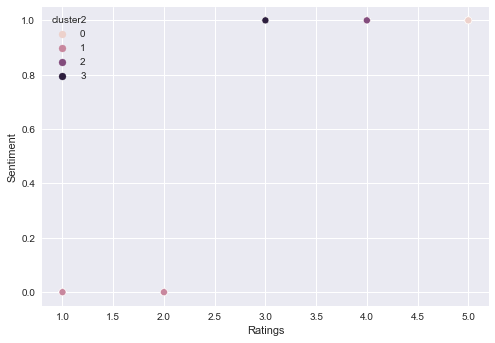

In [279]:
# Draw
import seaborn as sns


sns.scatterplot(x='Ratings' , y='Sentiment' , hue='cluster2' , data=df)